In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/Concrete_compressive_strength.csv')
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water,Superplasticizer (component 5)(kg in a m^3 mixture),Coarse_agg,Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
data.head(10)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water,Superplasticizer (component 5)(kg in a m^3 mixture),Coarse_agg,Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [ ]:
cor=data.corr()
cor

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water,Superplasticizer (component 5)(kg in a m^3 mixture),Coarse_agg,Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),Strength
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash (component 3)(kg in a m^3 mixture),-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer (component 5)(kg in a m^3 mixture),0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse_agg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age (day),0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [ ]:
abs(cor.loc['Strength']).sort_values(ascending=False)

Strength                                                 1.000000
Cement (component 1)(kg in a m^3 mixture)                0.497832
Superplasticizer (component 5)(kg in a m^3 mixture)      0.366079
Age (day)                                                0.328873
Water                                                    0.289633
Fine Aggregate (component 7)(kg in a m^3 mixture)        0.167241
Coarse_agg                                               0.164935
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.134829
Fly Ash (component 3)(kg in a m^3 mixture)               0.105755
Name: Strength, dtype: float64

In [ ]:
x=data['Strength']
y=data['Cement (component 1)(kg in a m^3 mixture)']
x=np.array(x/x.mean())
y=np.array(y/y.mean())

In [ ]:

print(np.shape(x))
print(np.shape(y))

(1030,)
(1030,)


In [ ]:
print(x)
print(y)

[2.23323711 1.72790405 1.12429627 ... 0.6616792  0.91490411 0.9045741 ]
[1.92056088 1.92056088 1.18256758 ... 0.52815424 0.56585414 0.92791543]


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
print(np.shape(xtrain),np.shape(ytest))

(824,) (206,)


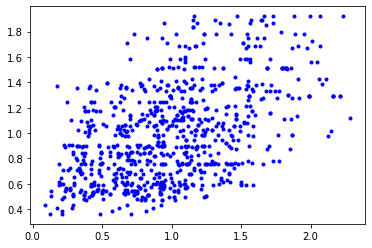

In [ ]:
plt.plot(xtrain, ytrain, 'b.')

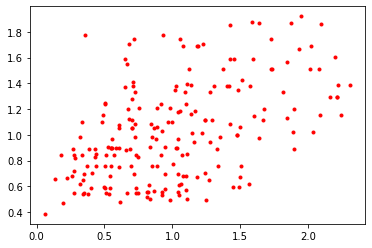

In [ ]:
plt.plot(xtest, ytest, 'r.')

In [ ]:
def hypothesis(a,b,x):
  return a*x + b

In [ ]:
def error(a,b,x,y):
  e = 0
  m = len(y)
  for i in range(m):
    e += np.power((hypothesis(a,b,x[i])-y[i]),2)
  return (1/(2*m)) *e

In [ ]:
def step_gradiet(a,b,x,y,learning_rate):
  grad_a = 0
  grad_b = 0
  m = len(x)
  for i in range(m):
    grad_a += 1/m * (hypothesis(a,b,x[i])-y[i]) *x[i]
    grad_b += 1/m * (hypothesis(a,b,x[i])-y[i])
  a = a- (grad_a * learning_rate)
  b = b- (grad_b * learning_rate)
  return a,b

In [ ]:
def descend(initial_a, initial_b, x,y,learning_rate, iterations):
  a = initial_a
  b = initial_b
  for i in range(iterations):
    e = error(a,b,x,y)
    if i % 1000 ==0:
      print(f"Error: {e}, a: {a}, b: {b}")
    a,b = step_gradiet(a,b,x,y,learning_rate)
  return a,b

In [ ]:
a = 0
b = 1
learning_rate = 0.01
iterations = 10000
final_a, final_b = descend(a,b,xtrain, ytrain, learning_rate, iterations)

Error: 0.06852900588617984, a: 0, b: 1
Error: 0.053743298754590066, a: 0.261693576332586, b: 0.7484208803466679
Error: 0.051718771100777404, a: 0.35372527679253796, b: 0.6467832501706633
Error: 0.05142854753062414, a: 0.38857039401794324, b: 0.608301128020621
Error: 0.05138694290224868, a: 0.4017634806232228, b: 0.5937309956546919
Error: 0.05138097872400727, a: 0.40675865779678405, b: 0.5882144402959991
Error: 0.05138012373687042, a: 0.40864993583821624, b: 0.5861257576223471
Error: 0.051380001171283864, a: 0.4093660130674551, b: 0.5853349388908103
Error: 0.05137998360105119, a: 0.40963713481000197, b: 0.5850355184599153
Error: 0.051379981082292955, a: 0.40973978714452813, b: 0.5849221516530065


In [ ]:
print(error(a,b,xtrain, ytrain))
print(error(final_a,final_b, xtrain, ytrain))


0.06852900588617984
0.05137998072121957


In [ ]:
err=error(final_a, final_b, xtest, ytest)
err


0.05417207659956705

In [ ]:
accuracy=(1-err)*100
accuracy

94.5827923400433

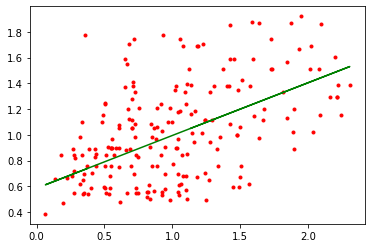

In [ ]:
plt.plot(xtest, ytest, 'r.', xtest, hypothesis(final_a, final_b, xtest), 'g')